In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/world-happiness-report-2021.csv')

In [5]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                149 non-null    object 
 1   Regional indicator                          149 non-null    object 
 2   Ladder score                                149 non-null    float64
 3   Standard error of ladder score              149 non-null    float64
 4   upperwhisker                                149 non-null    float64
 5   lowerwhisker                                149 non-null    float64
 6   Logged GDP per capita                       149 non-null    float64
 7   Social support                              149 non-null    float64
 8   Healthy life expectancy                     149 non-null    float64
 9   Freedom to make life choices                149 non-null    float64
 10  Generosity    

In [7]:
df.isnull().sum()

,0
Country name,0
Regional indicator,0
Ladder score,0
Standard error of ladder score,0
upperwhisker,0
lowerwhisker,0
Logged GDP per capita,0
Social support,0
Healthy life expectancy,0
Freedom to make life choices,0


Key Questions to Answer:
1. Which countries rank highest in happiness, and why?
2. Is there a strong correlation between GDP per capita and happiness?
3. How do social support, freedom, and corruption perceptions impact happiness?
4. Has global happiness improved over the years?


In [8]:
# 1. Which country rank highest in happiness, and why

# Group ladder score by Country
country_happiness = df.groupby('Country name')['Ladder score'].mean()
country_happiness = country_happiness.sort_values(ascending=False)

In [9]:
country_happiness

,Ladder score
Country name,
Finland,7.842
Denmark,7.620
Switzerland,7.571
Iceland,7.554
Netherlands,7.464
...,...
Lesotho,3.512
Botswana,3.467
Rwanda,3.415


Finland is ranked the happiest nation with ladder score of 7,842.

In [10]:
# 2. Correlation between Explained GDP per capital and happiness Score

print(df['Logged GDP per capita'].corr(df['Ladder score']))

0.7897596965098931


There is strong correlation of 0.79between Explained GDP per capita and happiness

In [11]:
# 3. How do social support, freedom, and corruption perceptions impact happiness?
corr_support = df['Social support'].corr(df['Ladder score'])
print('The correlation between social support and Ladder score is:{:.2f}'.format (corr_support) )
corr_freedom = df['Freedom to make life choices'].corr(df['Ladder score'])
print('The correlation between freedom to make life choices and Ladder score is:{:.2f}'.format (corr_freedom) )
corr_corruption = df['Perceptions of corruption'].corr(df['Ladder score'])
print('The correlation between perceptions of corruption and Ladder score is:{:.2f}'.format (corr_corruption) )

The correlation between social support and Ladder score is:0.76
The correlation between freedom to make life choices and Ladder score is:0.61
The correlation between perceptions of corruption and Ladder score is:-0.42


social support and happiness are strongly positively correlated. Also with with freedom to make life choice with positive correlation coefficient of 0.61.
However, perception of corruption has an inverse relationship happiness of the people

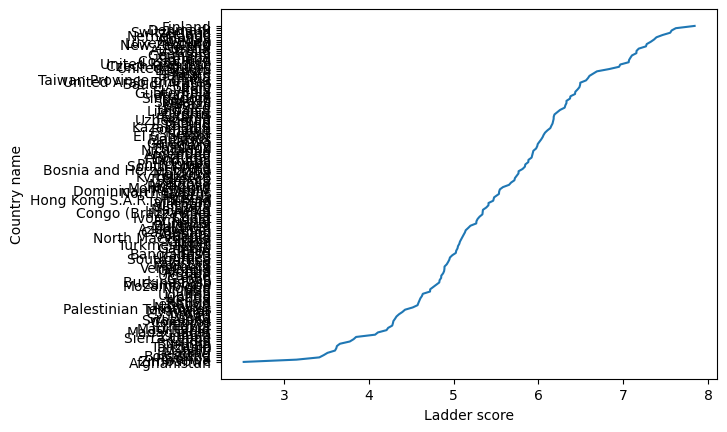

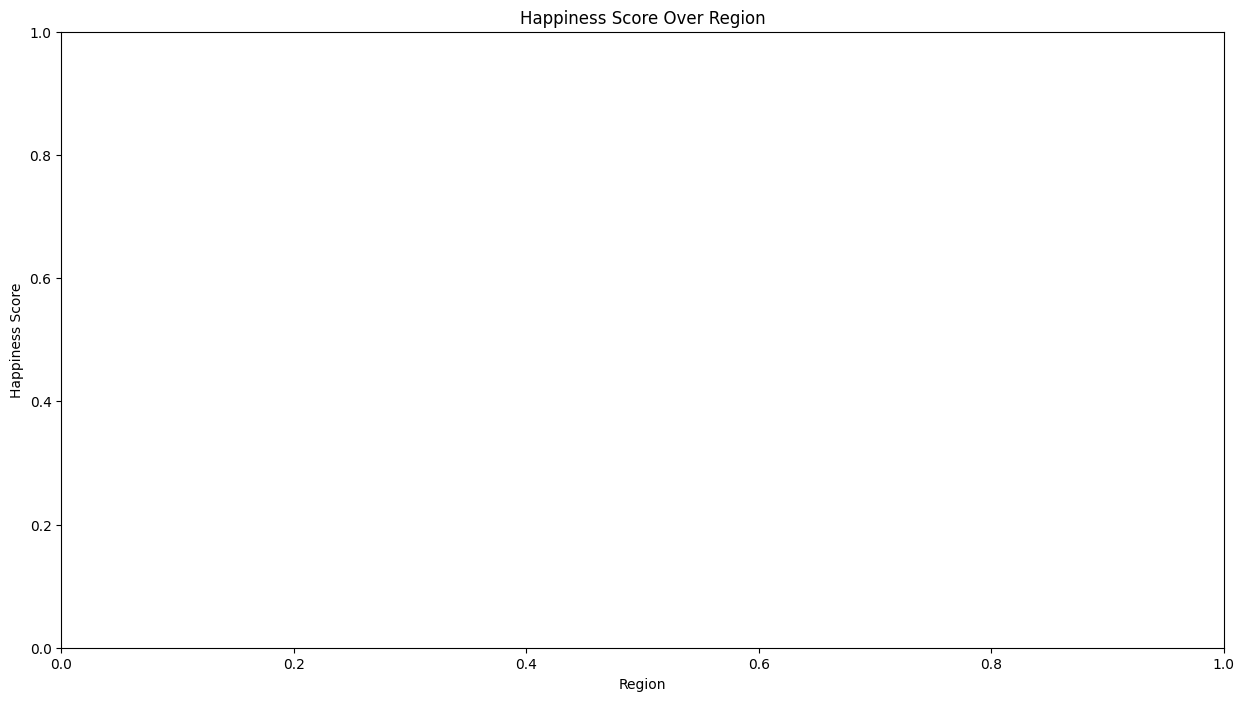

In [12]:
# Has global happiness improved over the years?

# A Lineplot showing trends of happiness score over time

sns.lineplot(data=df, y='Country name', x='Ladder score')
plt.figure(figsize=(15,8))
plt.title('Happiness Score Over Region')
plt.xlabel('Region')
plt.ylabel('Happiness Score')
plt.show()

<Figure size 1500x800 with 0 Axes>

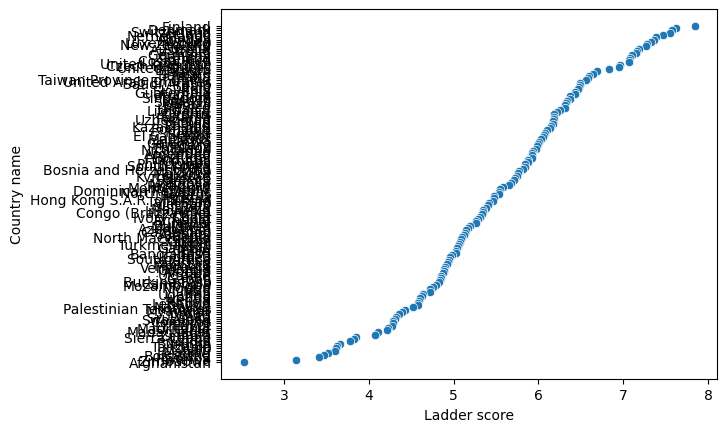

<Figure size 1500x800 with 0 Axes>

In [13]:
# scatterplot of happiness score
sns.scatterplot(data=df, x='Ladder score', y='Country name')
plt.figure(figsize=(15,8))

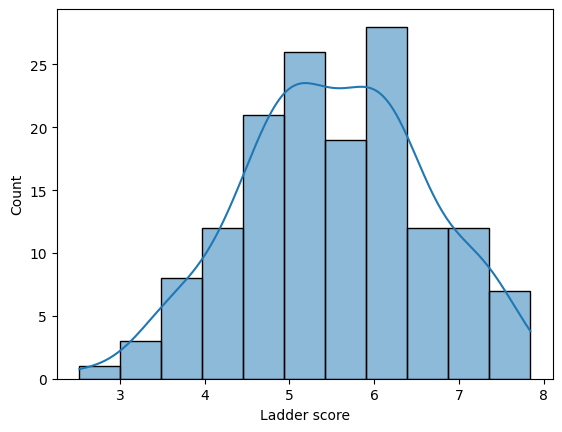

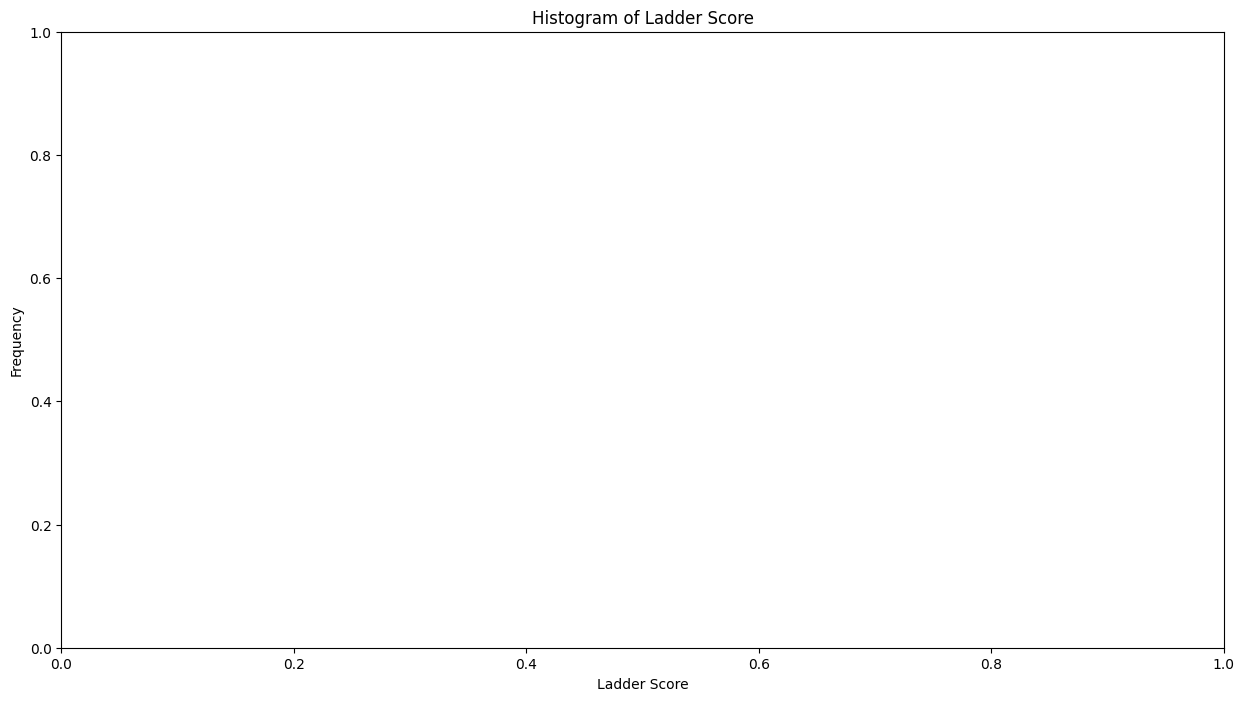

In [16]:
# Histogram of ladder score
sns.histplot(data=df, x='Ladder score', kde = True)
plt.figure(figsize=(15,8))
plt.title('Histogram of Ladder Score')
plt.xlabel('Ladder Score')
plt.ylabel('Frequency')
plt.show()

